In [143]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [144]:
test = 2
bearing = 1
data_type = 'time'
df = pd.read_csv((f'nasa_bearing_dataset/target_test{test}_bearing_{0}_{data_type}.csv'), index_col=False)

In [145]:
df.drop(columns='Unnamed: 0',inplace=True)

In [146]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20471,20472,20473,20474,20475,20476,20477,20478,20479,fault
0,-0.049,-0.042,0.015,-0.051,-0.107,-0.078,-0.020,-0.046,-0.063,0.068,...,0.012,-0.032,-0.029,-0.017,0.049,0.037,-0.012,-0.012,0.020,Normal
1,-0.088,0.022,-0.015,-0.083,-0.056,0.117,0.063,-0.056,-0.007,-0.051,...,-0.059,-0.005,0.049,0.024,-0.059,0.010,0.120,0.098,0.010,Normal
2,0.112,0.049,-0.027,-0.110,0.007,0.122,0.134,-0.015,-0.168,-0.061,...,-0.020,0.002,-0.002,-0.049,-0.125,-0.024,-0.068,-0.105,-0.010,Normal
3,0.017,-0.085,-0.122,-0.039,-0.063,-0.127,-0.022,-0.005,0.044,-0.012,...,-0.144,-0.222,-0.059,-0.027,-0.088,-0.098,-0.012,-0.049,-0.051,Normal
4,-0.066,0.051,0.020,0.034,-0.081,0.015,0.112,0.051,0.066,0.032,...,0.149,0.090,-0.015,0.051,0.081,0.073,-0.022,-0.020,0.076,Normal


In [147]:
df['fault'].unique()

array(['Normal', 'Outer Race'], dtype=object)

In [148]:
encoder = LabelEncoder()
df['fault'] = encoder.fit_transform(df['fault'])

In [149]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20471,20472,20473,20474,20475,20476,20477,20478,20479,fault
0,-0.049,-0.042,0.015,-0.051,-0.107,-0.078,-0.020,-0.046,-0.063,0.068,...,0.012,-0.032,-0.029,-0.017,0.049,0.037,-0.012,-0.012,0.020,0
1,-0.088,0.022,-0.015,-0.083,-0.056,0.117,0.063,-0.056,-0.007,-0.051,...,-0.059,-0.005,0.049,0.024,-0.059,0.010,0.120,0.098,0.010,0
2,0.112,0.049,-0.027,-0.110,0.007,0.122,0.134,-0.015,-0.168,-0.061,...,-0.020,0.002,-0.002,-0.049,-0.125,-0.024,-0.068,-0.105,-0.010,0
3,0.017,-0.085,-0.122,-0.039,-0.063,-0.127,-0.022,-0.005,0.044,-0.012,...,-0.144,-0.222,-0.059,-0.027,-0.088,-0.098,-0.012,-0.049,-0.051,0
4,-0.066,0.051,0.020,0.034,-0.081,0.015,0.112,0.051,0.066,0.032,...,0.149,0.090,-0.015,0.051,0.081,0.073,-0.022,-0.020,0.076,0


In [150]:
df.isna().sum().sum()

np.int64(0)

In [151]:
df.shape

(982, 20481)

In [152]:
# Standardize the features
X = df.drop("fault", axis=1) 
y = df["fault"]
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(785, 20480)
(197, 20480)
(785,)
(197,)


In [154]:
pd.DataFrame(y_train).groupby('fault').agg({'fault':['count']})

,fault
,count
fault,
0,425
1,360


In [155]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Normal', 'Outer Race']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Normal', 'Outer Race']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       111
           1       0.70      0.69      0.69        86

    accuracy                           0.74       197
   macro avg       0.73      0.73      0.73       197
weighted avg       0.74      0.74      0.74       197

AUC ROC :  0.7304106432013407


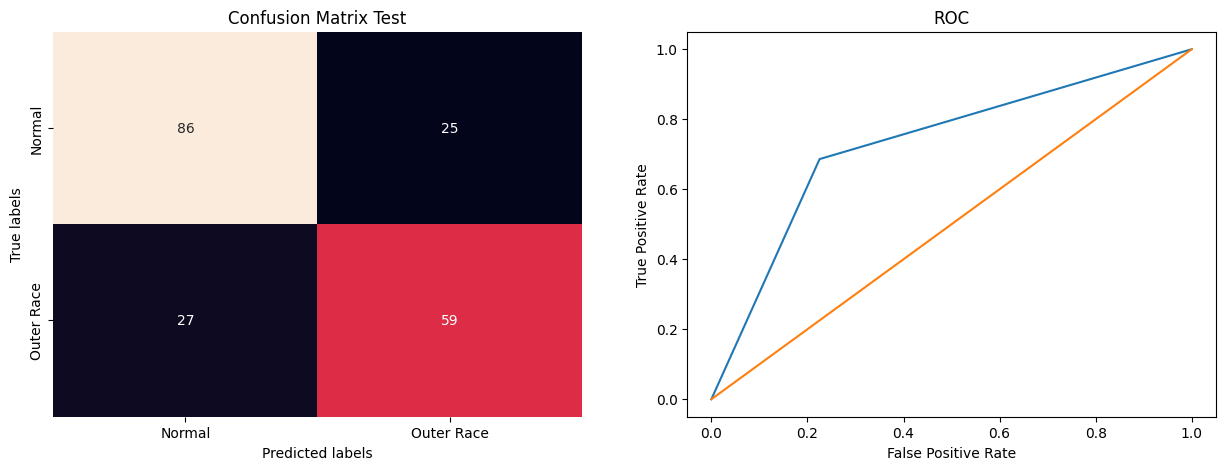

In [156]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

              precision    recall  f1-score   support

           0       0.59      0.94      0.73       111
           1       0.68      0.17      0.28        86

    accuracy                           0.60       197
   macro avg       0.64      0.56      0.50       197
weighted avg       0.63      0.60      0.53       197

AUC ROC :  0.5556777707940499


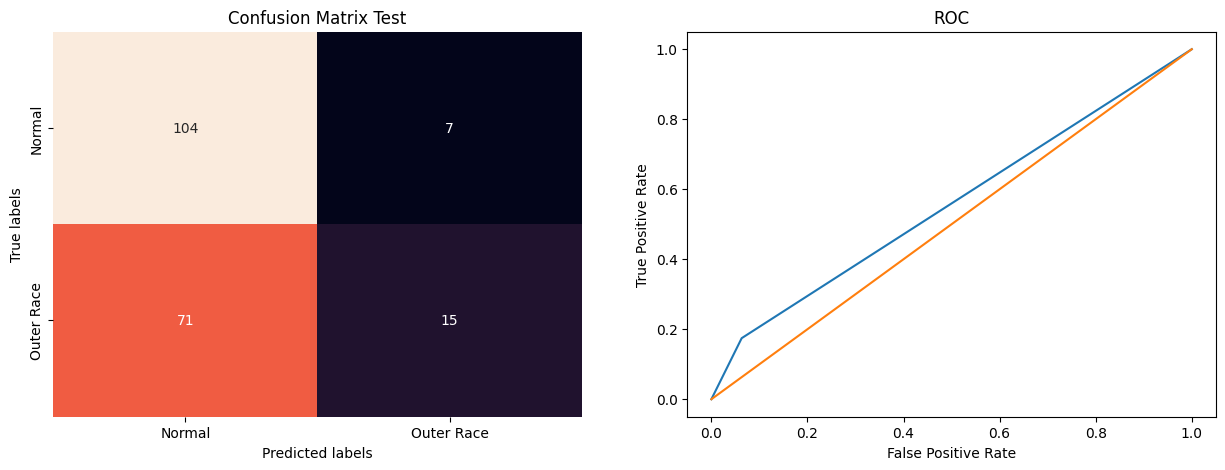

In [157]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       111
           1       1.00      0.78      0.88        86

    accuracy                           0.90       197
   macro avg       0.93      0.89      0.90       197
weighted avg       0.92      0.90      0.90       197

AUC ROC :  0.8895348837209303


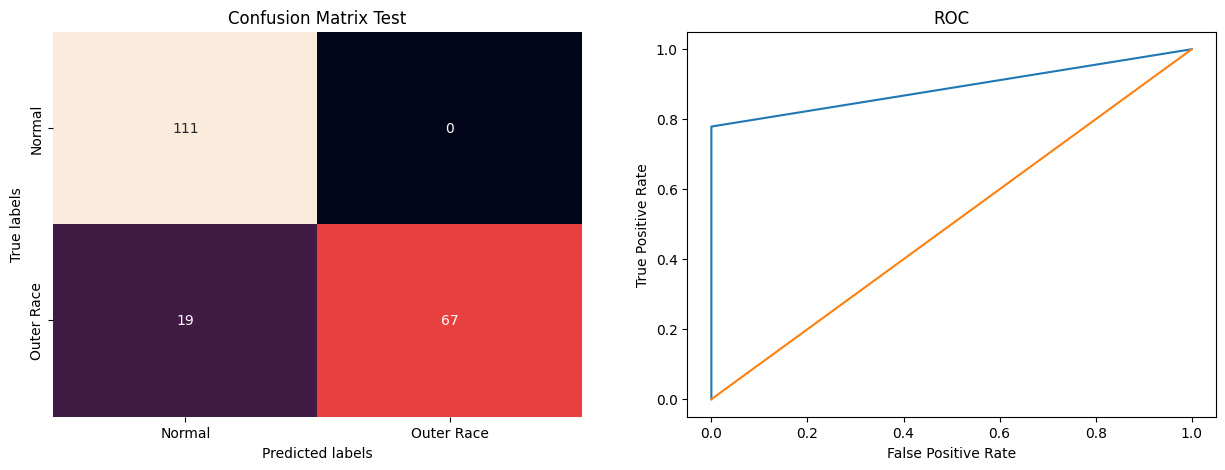

In [158]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       111
           1       0.90      0.64      0.75        86

    accuracy                           0.81       197
   macro avg       0.84      0.79      0.80       197
weighted avg       0.83      0.81      0.81       197

AUC ROC :  0.792740414833438


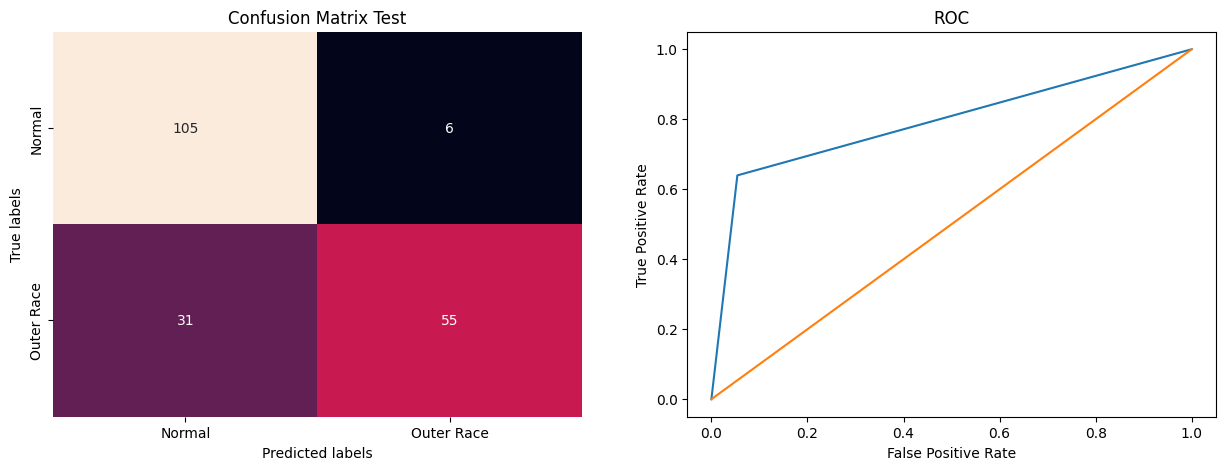

In [159]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)